In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import os
from PIL import Image

In [2]:
def load_file(file_dir,file):
    img = file_dir+"\\"+file+".png"
    img = Image.open(img).convert('L')
    img = img.resize((28,28))
    img2array = np.array(img)
    img2array = img2array.reshape(1,28,28)
    return img2array

In [3]:
data = keras.datasets.mnist
(train_x,train_y),(test_x,test_y) = data.load_data()
train_x = train_x/255
test_x = test_x/255
#print(f"train: {train_x[0]},{train_y[0]} test: {test_x[0]},{test_y[0]}")

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(400,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train_x,train_y,epochs=4)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 12s 205us/sample - loss: 0.2114 - accuracy: 0.9371
Epoch 2/4
60000/60000 [==============================] - 11s 190us/sample - loss: 0.0844 - accuracy: 0.9746
Epoch 3/4
60000/60000 [==============================] - 11s 186us/sample - loss: 0.0544 - accuracy: 0.9831
Epoch 4/4
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0385 - accuracy: 0.9880


In [5]:
test_loss,test_acc = model.evaluate(test_x,test_y)
print("test_acc: ",test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_acc:  0.9821


9
9


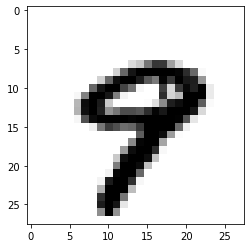

In [6]:
prediction = model.predict(test_x)
print(np.argmax(prediction[9]))
print(test_y[9])
ready_to_graph = test_x[9].reshape(28,28)
plt.imshow(ready_to_graph,cmap=plt.cm.binary)
plt.show()

2


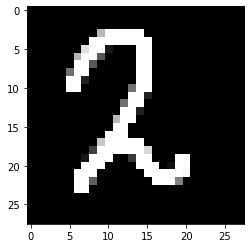

In [11]:
file_path = os.getcwd()

own_test = load_file(file_path,'test_2_NN')
own_test = own_test/255
predict = model.predict(own_test)
predict = np.exp(predict)
#print(predict)
print(np.argmax(predict))
plt.imshow(own_test[0],cmap='gray')
